In [1]:
import pandas as pd
from sklearn.datasets import fetch_california_housing

# 使用fetch_california_housing获取加利福尼亚房价数据
data = fetch_california_housing(data_home='data')
# 转为DataFrame查看一下
df = pd.DataFrame(data.data, columns=data.feature_names)
# 添加标签列
df['price'] = data.target
df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [2]:
from sklearn.model_selection import train_test_split
import numpy as np

# 分割特征和标签
X = df.drop('price', axis=1).values
y = df['price'].values
print(y.shape)
# 划分训练集和测试集（80%训练 20%测试）
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.preprocessing import StandardScaler

# 对特征数据进行标准化 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


from sklearn.linear_model import LinearRegression

# 使用LinearRegression训练线性回归模型
lr = LinearRegression()
lr.fit(X_train, y_train)

# 打印回归系数
print("回归系数:", lr.coef_)
print("截距项:", lr.intercept_)

# 预测
y_pred = lr.predict(X_test)

# 评估：计算均方误差 MSE
mse = np.mean((y_pred - y_test) ** 2)
print(f"正规方程测试集均方误差 MSE: {mse}")

(20640,)
回归系数: [ 0.85438303  0.12254624 -0.29441013  0.33925949 -0.00230772 -0.0408291
 -0.89692888 -0.86984178]
截距项: 2.071946937378619
正规方程测试集均方误差 MSE: 0.5558915986952442


In [17]:
from sklearn.linear_model import SGDRegressor

# learning_rate的不同方式，代表学习率变化的算法不一样,比如constant,invscaling,adaptive
# 默认可以去调 eta0 = 0.008，会改变learning_rate的初始值
# learning_rate='optimal',alpha是正则化力度，但是会影响学习率的值，由alpha来算学习率
# learning_rate变化方式：constant,optimal,invscaling,adaptive
# invscaling代表学习率随着迭代次数的增加而减小
# penalty代表正则化，分为l1和l2
# eta0=0.01, penalty='l2',max_iter=1000
sgd_reg = SGDRegressor(eta0=0.01,penalty='l2', max_iter=1000)

# 训练模型
sgd_reg.fit(X_train, y_train)

# 打印回归系数和截距
print("SGD回归系数:", sgd_reg.coef_)
print("SGD截距项:", sgd_reg.intercept_)

# 预测
y_pred_sgd = sgd_reg.predict(X_test)

# 评估：计算均方误差 MSE
mse_sgd = np.mean((y_pred_sgd - y_test) ** 2)
print(f"SGDRegressor测试集均方误差 MSE: {mse_sgd}")


SGD回归系数: [ 0.87519804  0.1493529  -0.3356338   0.37735856  0.00974038 -0.05850104
 -0.84918061 -0.82379864]
SGD截距项: [2.08233572]
SGDRegressor测试集均方误差 MSE: 0.5606945742459778


# 对于SGD必须进行标准化，为什么

➡ 特征值大的维度（如 Population）会主导梯度
➡ 小尺度特征几乎“失声”
➡ 参数更新方向严重失衡
➡ 模型学不好

# Lasso 回归

In [4]:
from sklearn.linear_model import Lasso

# 创建Lasso回归模型，可以设置alpha控制正则化强度
lasso_reg = Lasso(alpha=0.001)
# 训练模型
lasso_reg.fit(X_train, y_train)

# 打印回归系数
print("Lasso回归系数:", lasso_reg.coef_)

# 预测
y_pred_lasso = lasso_reg.predict(X_test)

# 评估：计算均方误差 MSE
mse_lasso = np.mean((y_pred_lasso - y_test) ** 2)
print(f"Lasso回归测试集均方误差 MSE: {mse_lasso}")


Lasso回归系数: [ 0.84914038  0.12334631 -0.28127333  0.32604963 -0.00106185 -0.03988954
 -0.88582217 -0.85809324]
Lasso回归测试集均方误差 MSE: 0.5544913600832686


In [5]:
np.random.seed(22)
# 1. 准备数据X,y 增加噪声
# 创建100个数据,在[-3,3]中取值,值是均匀分布的
x = np.random.uniform(-3, 3, size=100)
x

array([-1.74923678, -0.10991363, -0.47677179,  2.15509199, -1.97303068,
       -0.96681624, -1.376803  ,  1.1462481 , -1.6775729 ,  1.87170552,
       -2.93683875,  0.36722218,  1.88235712,  1.47060178, -1.86533187,
       -2.9631548 ,  1.63226323,  2.74699301,  1.2116273 , -1.2145304 ,
        1.60795645,  1.12930995, -0.67689912,  0.69123495, -0.43466856,
        0.50573786,  1.21581311, -2.32862897,  2.53961956,  2.93331764,
        1.06446464,  1.77098865, -2.8255419 , -1.93344557,  2.24956647,
        1.46959246,  0.04854098, -2.22999659, -0.09429457,  0.09464093,
       -1.13241202, -2.72603074, -0.37391604, -2.42469234, -2.72873933,
        1.10897231,  2.09514447, -2.2487569 , -2.22561596, -0.16163999,
       -1.81464895,  1.68973649,  0.64448318, -0.33899943,  2.89217465,
        1.25373248, -1.68761751, -1.99507021,  0.23259284, -1.11947527,
        2.46922198, -2.48246592, -1.11555582, -1.68517583,  1.41999738,
        1.97124219,  1.46738678, -1.93477777,  2.15071918, -2.96

(100, 1)
(100, 10)
Ridge回归MSE: 0.8340220252344763
Ridge回归权重w: [ 9.61199650e-01  1.03752625e+00 -4.41366376e-01 -2.45484025e-01
  2.81460639e-01  3.49426802e-02 -5.58289858e-02 -5.58964522e-05
  3.38758035e-03 -1.84530373e-04]


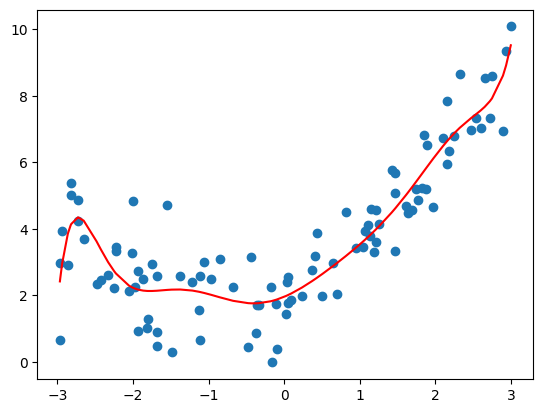

array([ 9.61199650e-01,  1.03752625e+00, -4.41366376e-01, -2.45484025e-01,
        2.81460639e-01,  3.49426802e-02, -5.58289858e-02, -5.58964522e-05,
        3.38758035e-03, -1.84530373e-04])

In [6]:
# 岭回归
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt

# 1. 创建数据
# 随机种子
np.random.seed(22)
# 1. 准备数据X,y 增加噪声
# 创建100个数据,在[-3,3]中取值,值是均匀分布的
x = np.random.uniform(-3, 3, size=100)

# y = 0.5x^2 + x + 2
# np.random.normal(0,1,size=100): 增加噪声,噪声值为均值为0,方差为1的正态分布数据
y = 0.5 * x ** 2 + x + 2 + np.random.normal(0,1,size=100)

# 2. 创建模型
# alpha: 正则化参数
model = Ridge()

# 3. 模型训练
# 训练数据是二维的,所以X需要reshape成二维的
# -1的作用是告诉numpy,根据y的维度自动确定X的维度
# 1 是列数
X = x.reshape(-1,1)
print(X.shape)

# 堆叠，增加多次项
X2 = np.hstack([X,X ** 2, X ** 3, X ** 4, X ** 5, X ** 6, X ** 7, X ** 8, X ** 9, X ** 10])
print(X2.shape)

model.fit(X2,y)

# 4. 模型预测
y_predict = model.predict(X2)

# 5. 模型评估
mse = mean_squared_error(y,y_predict)
print("Ridge回归MSE:",mse)
print("Ridge回归权重w:", model.coef_)

# 6. 绘制图像
plt.scatter(x,y)	
# # 画图plot折线图时 需要对x进行排序, 取x排序后对应的y值
plt.plot(np.sort(x), y_predict[np.argsort(x)], color='r')
plt.show()
model.coef_

(100, 1)
(100, 10)
线性回归MSE: 0.8144736129032126
线性回归权重w: [ 1.48390146e+00  1.91708406e+00 -1.09189930e+00 -9.60331272e-01
  5.22612600e-01  2.48127460e-01 -9.01884785e-02 -2.65810071e-02
  5.04735223e-03  9.83074618e-04]


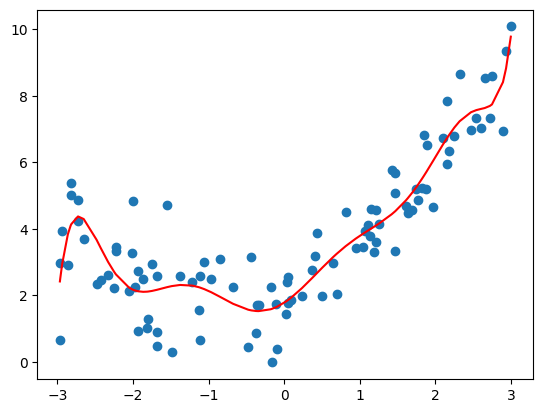

array([ 1.48390146e+00,  1.91708406e+00, -1.09189930e+00, -9.60331272e-01,
        5.22612600e-01,  2.48127460e-01, -9.01884785e-02, -2.65810071e-02,
        5.04735223e-03,  9.83074618e-04])

In [7]:
# 2. 创建模型
# 线性回归，不加正则
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# 3. 模型训练
# 训练数据是二维的,所以X需要reshape成二维的
# -1的作用是告诉numpy,根据y的维度自动确定X的维度
# 1 是列数
X = x.reshape(-1,1)
print(X.shape)

# 堆叠，增加多次项
X2 = np.hstack([X,X ** 2, X ** 3, X ** 4, X ** 5, X ** 6, X ** 7, X ** 8, X ** 9, X ** 10])
print(X2.shape)

model.fit(X2,y)

# 4. 模型预测
y_predict = model.predict(X2)

# 5. 模型评估
mse = mean_squared_error(y,y_predict)
print("线性回归MSE:", mse)
print("线性回归权重w:", model.coef_)

# 6. 绘制图像
plt.scatter(x,y)	
# # 画图plot折线图时 需要对x进行排序, 取x排序后对应的y值
plt.plot(np.sort(x), y_predict[np.argsort(x)], color='r')
plt.show()
model.coef_